In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import os, glob, sys

def q(text = ''): # Just an exit function 
    print(text)
    sys.exit()

# Input data files are available in the "/kaggle/input/" directory.

data_dir = 'mobile-gallery-image-classification-data/mobile_gallery_image_classification/train'

for class_dir in glob.glob(data_dir + os.sep + '*'):
    print(class_dir)

# Any results you write to the current directory ('/kaggle/working') are saved as output.

mobile-gallery-image-classification-data/mobile_gallery_image_classification/train\Cars
mobile-gallery-image-classification-data/mobile_gallery_image_classification/train\Memes
mobile-gallery-image-classification-data/mobile_gallery_image_classification/train\Mountains
mobile-gallery-image-classification-data/mobile_gallery_image_classification/train\Selfies
mobile-gallery-image-classification-data/mobile_gallery_image_classification/train\Trees
mobile-gallery-image-classification-data/mobile_gallery_image_classification/train\Whatsapp_Screenshots


In [4]:
# Let's start by loading in the image data
import torch
from torchvision import datasets, transforms

# Defining the transforms that we want to apply to the data.
# Resizing the image to (224,224),
# Randomly flipping the image horizontally(with the default probability of 0.5),
# Converting the image to Tensore (converting the pixel values btween 0 and 1), 
# Normalizing the 3-channel data using the 'Imagenet' stats
data_transforms = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

print('data_transforms: ', data_transforms)

dataset = datasets.ImageFolder(data_dir, transform = data_transforms)
print('dataset: ', dataset)

# We need to split the dataset between train and val datasets
train_percentage = 0.8
train_size = int(len(dataset)*train_percentage)
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

print('\nnumber of examples in train_dataset: ', len(train_dataset))
print('number of examples in val_dataset  : ', len(val_dataset))

device:  cuda
data_transforms:  Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
dataset:  Dataset ImageFolder
    Number of datapoints: 1266
    Root Location: mobile-gallery-image-classification-data/mobile_gallery_image_classification/train
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

number of examples in train_dataset:  1012
number of examples in val_dataset  :  254


In [5]:
# Defining dataloaders which would return data in batches
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader   = torch.utils.data.DataLoader(val_dataset,   batch_size = batch_size, shuffle = False)

print('number of batches in train_loader with a batch_size of {}: {}'.format(batch_size,  len(train_loader)))
print('number of batches in val_loader with a batch_size of {}: {}'.format(batch_size,  len(val_loader)))

number of batches in train_loader with a batch_size of 64: 16
number of batches in val_loader with a batch_size of 64: 4


In [4]:
# This is how we see all the classes present in the dataset. These are nothing but the names of the directories present in the 'data_dir'
print('dataset.classes: ', dataset.classes)

dataset.classes:  ['Cars', 'Memes', 'Mountains', 'Selfies', 'Trees', 'Whatsapp_Screenshots']


In [6]:
import torch
import torch.nn as nn
from torchvision import models

# Defining the model
model = models.resnet34(pretrained = True)

# The original architecture of resnet34 has 1000 neurons(corresponding to 1000 classes on which it was originally trained on) in the final layer.
# So we need to change the final layer according to the number of classes that we have in our dataset
print('model.fc before: ', model.fc)
model_fc_in_features = model.fc.in_features
model.fc = nn.Linear(model_fc_in_features, len(dataset.classes))
print('model.fc after : ', model.fc)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\anime/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100%|█████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:16<00:00, 5.26MB/s]


model.fc before:  Linear(in_features=512, out_features=1000, bias=True)
model.fc after :  Linear(in_features=512, out_features=6, bias=True)


In [6]:
# Now let's have a look at the requires_grad attributes for all the parameters

for name, param in model.named_parameters():
    print('name: {} has requires_grad: {}'.format(name, param.requires_grad))

name: conv1.weight has requires_grad: True
name: bn1.weight has requires_grad: True
name: bn1.bias has requires_grad: True
name: layer1.0.conv1.weight has requires_grad: True
name: layer1.0.bn1.weight has requires_grad: True
name: layer1.0.bn1.bias has requires_grad: True
name: layer1.0.conv2.weight has requires_grad: True
name: layer1.0.bn2.weight has requires_grad: True
name: layer1.0.bn2.bias has requires_grad: True
name: layer1.1.conv1.weight has requires_grad: True
name: layer1.1.bn1.weight has requires_grad: True
name: layer1.1.bn1.bias has requires_grad: True
name: layer1.1.conv2.weight has requires_grad: True
name: layer1.1.bn2.weight has requires_grad: True
name: layer1.1.bn2.bias has requires_grad: True
name: layer1.2.conv1.weight has requires_grad: True
name: layer1.2.bn1.weight has requires_grad: True
name: layer1.2.bn1.bias has requires_grad: True
name: layer1.2.conv2.weight has requires_grad: True
name: layer1.2.bn2.weight has requires_grad: True
name: layer1.2.bn2.bias h

In [7]:
# We see that all the parameters are trainable at the beginning (requires_grad = True means that the parameter is learnable)

# Let's see what are the names of the layers so that we can freeze the last two of them
for name, module in model.named_children():
    print('name: ', name)

name:  conv1
name:  bn1
name:  relu
name:  maxpool
name:  layer1
name:  layer2
name:  layer3
name:  layer4
name:  avgpool
name:  fc


In [8]:
#  We would freeze all but the last few layers (layer4 and fc)

for name, param in model.named_parameters():
    if ('layer4' in name) or ('fc' in name):
        param.requires_grad = True
    else:
        param.requires_grad = False

In [9]:
# Let's print out the requires_grad for all the parameters and make sure that the desired changes have been made

for name, param in model.named_parameters():
    print('name: {} has requires_grad: {}'.format(name, param.requires_grad))

name: conv1.weight has requires_grad: False
name: bn1.weight has requires_grad: False
name: bn1.bias has requires_grad: False
name: layer1.0.conv1.weight has requires_grad: False
name: layer1.0.bn1.weight has requires_grad: False
name: layer1.0.bn1.bias has requires_grad: False
name: layer1.0.conv2.weight has requires_grad: False
name: layer1.0.bn2.weight has requires_grad: False
name: layer1.0.bn2.bias has requires_grad: False
name: layer1.1.conv1.weight has requires_grad: False
name: layer1.1.bn1.weight has requires_grad: False
name: layer1.1.bn1.bias has requires_grad: False
name: layer1.1.conv2.weight has requires_grad: False
name: layer1.1.bn2.weight has requires_grad: False
name: layer1.1.bn2.bias has requires_grad: False
name: layer1.2.conv1.weight has requires_grad: False
name: layer1.2.bn1.weight has requires_grad: False
name: layer1.2.bn1.bias has requires_grad: False
name: layer1.2.conv2.weight has requires_grad: False
name: layer1.2.bn2.weight has requires_grad: False
name:

In [10]:
# Yes, the changes have been made ! (See, the parameters present in 'layer4' and 'fc' have requires_grad = True 
# and rest all the other parameters have requires_grad = False )

In [11]:
# Defining a trainer function which would train and validate the model

def trainer(dataloader_dict, model, loss_fn, optimizer, epochs = 1, log_interval = 1):
    print('Training started...')
    train_losses = []
    val_losses = []
    batch_train_losses = []
    batch_val_losses = []
    for epoch in range(epochs):
        print('epoch >>> {}/{}'.format(epoch + 1, epochs))

        for phase in ['train', 'val']:
            if phase == 'train':
                print('___TRAINING___')
                model.train()
            else:
                print('___VALIDATION___')
                model.eval()

            epoch_loss = 0    
            for batch_idx, (inputs, labels) in enumerate(loader[phase]):
                # Zero the parameter gradients
                optimizer.zero_grad()

                # forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    batch_loss = loss_fn(outputs, labels)
                    epoch_loss += batch_loss.item()*inputs.shape[0]
                    
                    # Saving the batch losses
                    if phase == 'train':
                        batch_train_losses.append(batch_loss.item())
                    else:
                        batch_val_losses.append(batch_loss.item())
                    
                    if phase == 'train':
                        # Backpropagation
                        batch_loss.backward()
                        optimizer.step()

                if (batch_idx + 1)%log_interval == 0:
                    print('batch_loss at batch_idx {}/{}: {}'.format(str(batch_idx).zfill(len(str(len(train_loader)))), len(train_loader), batch_loss))

            mean_epoch_loss = epoch_loss/len(loader[phase].dataset)
            print('>>> {} loss at epoch {}/{}: {}'.format(phase, epoch + 1, epochs, mean_epoch_loss))
            
            # Storing the losses
            if phase == 'train':
                train_losses.append(mean_epoch_loss)
            else:
                val_losses.append(mean_epoch_loss)
        
        print('====='*5)
        
    return train_losses, val_losses, batch_train_losses, batch_val_losses

In [12]:
import torch.optim as optim
from torch.optim import lr_scheduler

# Now we define the Loss Function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
lr = 0.00001
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = lr)

Training started...
epoch >>> 1/5
___TRAINING___
batch_loss at batch_idx 01/16: 1.8830947875976562
batch_loss at batch_idx 03/16: 1.7403203248977661
batch_loss at batch_idx 05/16: 1.7298262119293213
batch_loss at batch_idx 07/16: 1.5611944198608398


/opt/conda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


batch_loss at batch_idx 09/16: 1.5026812553405762
batch_loss at batch_idx 11/16: 1.3258850574493408
batch_loss at batch_idx 13/16: 1.2495317459106445
batch_loss at batch_idx 15/16: 1.305968165397644
>>> train loss at epoch 1/5: 1.5462412377120007
___VALIDATION___
batch_loss at batch_idx 01/16: 1.1894911527633667
batch_loss at batch_idx 03/16: 1.152886152267456
>>> val loss at epoch 1/5: 1.1689875689078504
epoch >>> 2/5
___TRAINING___
batch_loss at batch_idx 01/16: 1.0216645002365112
batch_loss at batch_idx 03/16: 1.0510553121566772
batch_loss at batch_idx 05/16: 0.9224186539649963
batch_loss at batch_idx 07/16: 0.8934431672096252
batch_loss at batch_idx 09/16: 0.8022943735122681
batch_loss at batch_idx 11/16: 0.8075667023658752
batch_loss at batch_idx 13/16: 0.7715064287185669
batch_loss at batch_idx 15/16: 0.8646692633628845
>>> train loss at epoch 2/5: 0.8703589484154471
___VALIDATION___
batch_loss at batch_idx 01/16: 0.6990357637405396
batch_loss at batch_idx 03/16: 0.68622803688049

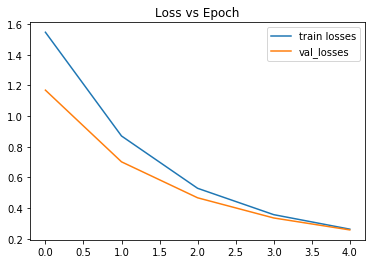

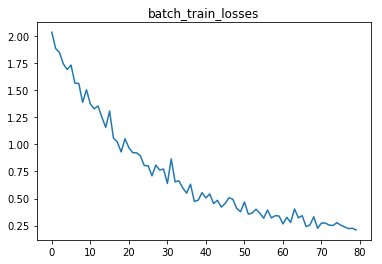

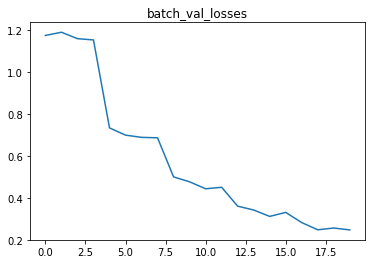

In [13]:
loader = {'train': train_loader, 'val': val_loader}

epochs = 5
log_interval = 2

# Let's train the model for 5 epochs !
train_losses, val_losses, batch_train_losses, batch_val_losses = trainer(loader, model, loss_fn, optimizer, epochs = epochs, log_interval = log_interval)

# Ploting the epoch losses
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['train losses', 'val_losses'])
plt.title('Loss vs Epoch')

plt.figure()
plt.plot(batch_train_losses)
plt.title('batch_train_losses')

plt.figure()
plt.plot(batch_val_losses)
plt.title('batch_val_losses')


# Saving the model(architecture and weights)
torch.save(model, 'stage1.pth')

In [14]:
# Loading the saved model 
model = torch.load('stage1.pth')

# Once we are done with loading the model, let's now have a look at the requires_grad attribute of all the parameters
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2.bias False
layer2.0.downsample.0.weight False
layer2.0.downsample.1.weight False
layer2.0.downsample.1.bias False
layer2.1.conv1.weight False
layer2.1.bn1.weight False
layer2.1.bn1.bias False
layer2.1.conv2.weight False
layer2.1.bn2.weight False
layer2.1.bn2.bias False
layer2.2.conv1.weight False
layer2.2.bn1.weight False
layer2.2.bn1

In [15]:
# The requires_grad settings are intact. Saving the weights using model.state_dict() and then loading 
# those weights would have reset all the requires_grad to True

# For details, check out the following blog which discusses this topic in more detail
# https://medium.com/@animesh7pointer/everything-you-need-to-know-about-saving-weights-in-pytorch-572651f3f8de?source=your_stories_page

Training started...
epoch >>> 1/3
___TRAINING___
batch_loss at batch_idx 01/16: 0.20289725065231323
batch_loss at batch_idx 03/16: 0.2349197268486023
batch_loss at batch_idx 05/16: 0.2194989025592804
batch_loss at batch_idx 07/16: 0.20219461619853973
batch_loss at batch_idx 09/16: 0.27012479305267334
batch_loss at batch_idx 11/16: 0.20639048516750336
batch_loss at batch_idx 13/16: 0.1523684412240982
batch_loss at batch_idx 15/16: 0.14577656984329224
>>> train loss at epoch 1/3: 0.2009116342887577
___VALIDATION___
batch_loss at batch_idx 01/16: 0.20299889147281647
batch_loss at batch_idx 03/16: 0.19083364307880402
>>> val loss at epoch 1/3: 0.20429044950196124
epoch >>> 2/3
___TRAINING___
batch_loss at batch_idx 01/16: 0.14590243995189667
batch_loss at batch_idx 03/16: 0.10861243307590485
batch_loss at batch_idx 05/16: 0.14622969925403595
batch_loss at batch_idx 07/16: 0.1130327433347702
batch_loss at batch_idx 09/16: 0.1342758983373642
batch_loss at batch_idx 11/16: 0.13757610321044922

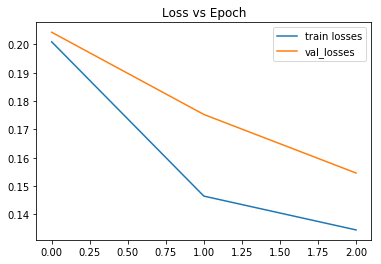

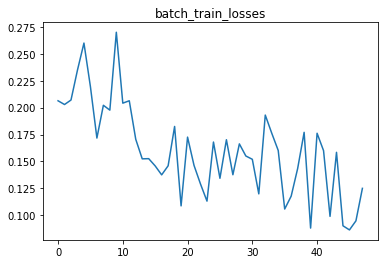

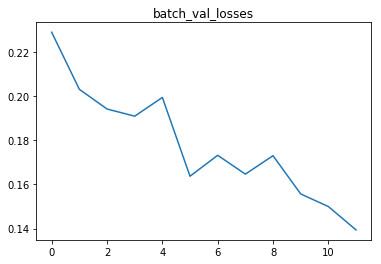

In [16]:
# We will now freeze the 'layer4' and train just the 'fc' layer of the model for 2 more epochs

for name, param in model.named_parameters():
    if 'layer4' in name:
        param.requires_grad = False # layer4 parameters would not get trained now
        

# Define the new learning rate and the new optimizer which would contain only the parameters with requires_grad = True 
lr = 0.0003
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = lr)
        
epochs = 3
log_interval = 2

# Let's train the model for 3 more epochs !
train_losses, val_losses, batch_train_losses, batch_val_losses = trainer(loader, model, loss_fn, optimizer, epochs = epochs, log_interval = log_interval)

# Ploting the epoch losses
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['train losses', 'val_losses'])
plt.title('Loss vs Epoch')

plt.figure()
plt.plot(batch_train_losses)
plt.title('batch_train_losses')

plt.figure()
plt.plot(batch_val_losses)
plt.title('batch_val_losses')


# Saving the model(architecture and weights)
torch.save(model, 'stage2.pth')

This Neural Network thinks that the given image belongs to >>> Memes <<< class with confidence of 95.21%


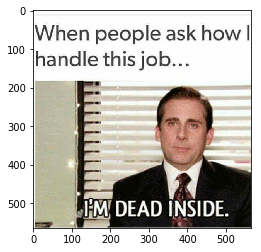

In [17]:
import cv2
import torch.nn.functional as F

# Making a 'predict' function which would take the 'model' and the path of the 'test image' as inputs, and predict the class that the test image belongs to.
def predict(model, test_img_path):
    img = cv2.imread(test_img_path)

    # Visualizing the test image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    img = transforms.Compose([transforms.ToPILImage()])(img)    
    img = data_transforms(img)
    img = img.view(1, img.shape[0], img.shape[2], img.shape[2]) # Expanding dimension
    
    model.eval()
    with torch.no_grad():
        logits = model(img)
        
    probs = F.softmax(logits, dim = 1)
    max_prob, ind = torch.max(probs, 1)
    
    print('This Neural Network thinks that the given image belongs to >>> {} <<< class with confidence of {}%'.format(dataset.classes[ind], round(max_prob.item()*100, 2)))
    
test_data_dir = '/kaggle/input/mobile_gallery_image_classification/mobile_gallery_image_classification/test'
test_img_list = []
for class_dir in glob.glob(test_data_dir + os.sep + '*'):
    test_img_list.append(class_dir)

# Loading the trained model(architecture as well as the weights) for making inferences
model = torch.load('stage2.pth')

# Select the test image index(choose a number from 0 to 6)
test_img_index = 3
predict(model, test_img_list[test_img_index])